# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Made Diksa Pitra
- **Email:** madediksapitra@gmail.com
- **ID Dicoding:** madediksapitra

## Menentukan Pertanyaan Bisnis

- Kapan waktu puncak penggunaan sepeda terjadi pada hari kerja dibandingkan dengan akhir pekan?
- Bagaimana pengaruh cuaca terhadap jumlah penggunaan sepeda oleh pengguna kasual dan terdaftar selama tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Wrangling

### Gathering Data

In [4]:
# Gathering data CSV files dari folder Data (hour.csv and day.csv)
hour_data = pd.read_csv('./Data/hour.csv')
day_data = pd.read_csv('./Data/day.csv')

# Menampilkan 5 baris pertama untuk kedua dataset
print("Dataset hour.csv\n")
print(hour_data.head(5))
print("\nDataset day.csv\n")
print(day_data.head(5))

Dataset hour.csv

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Dataset day.csv

   instant      dteday  season  yr  mnth  holiday  weekday  wor

### Assessing Data

In [5]:
# Pengecekan data yang duplikat
duplicate_rows_hour = hour_data[hour_data.duplicated()]
duplicate_rows_day = day_data[day_data.duplicated()]
print(f"Total data duplikat pada hour.csv: {duplicate_rows_hour.shape[0]}")
print(f"\nTotal data duplikat pada day.csv: {duplicate_rows_day.shape[0]}")

# Menampilkan jumlah data yang missing value
print("\nMissing values pada hour.csv:\n", hour_data.isnull().sum())
print("\nMissing values pada day.csv:\n", day_data.isnull().sum())

Total data duplikat pada hour.csv: 0

Total data duplikat pada day.csv: 0

Missing values pada hour.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values pada day.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Cleaning Data

In [6]:
"""
Dikarenakan tidak ada data yang duplikat maupun missing value,
di sini saya tidak melakukan cleaning data dikarenakan dataset
tersebut sudah bersih.
"""

'\nDikarenakan tidak ada data yang duplikat maupun missing value,\ndi sini saya tidak melakukan cleaning data dikarenakan dataset\ntersebut sudah bersih.\n'

## Exploratory Data Analysis (EDA)

### Explore ...

Informasi Dataset - Hourly Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Rangkuman P

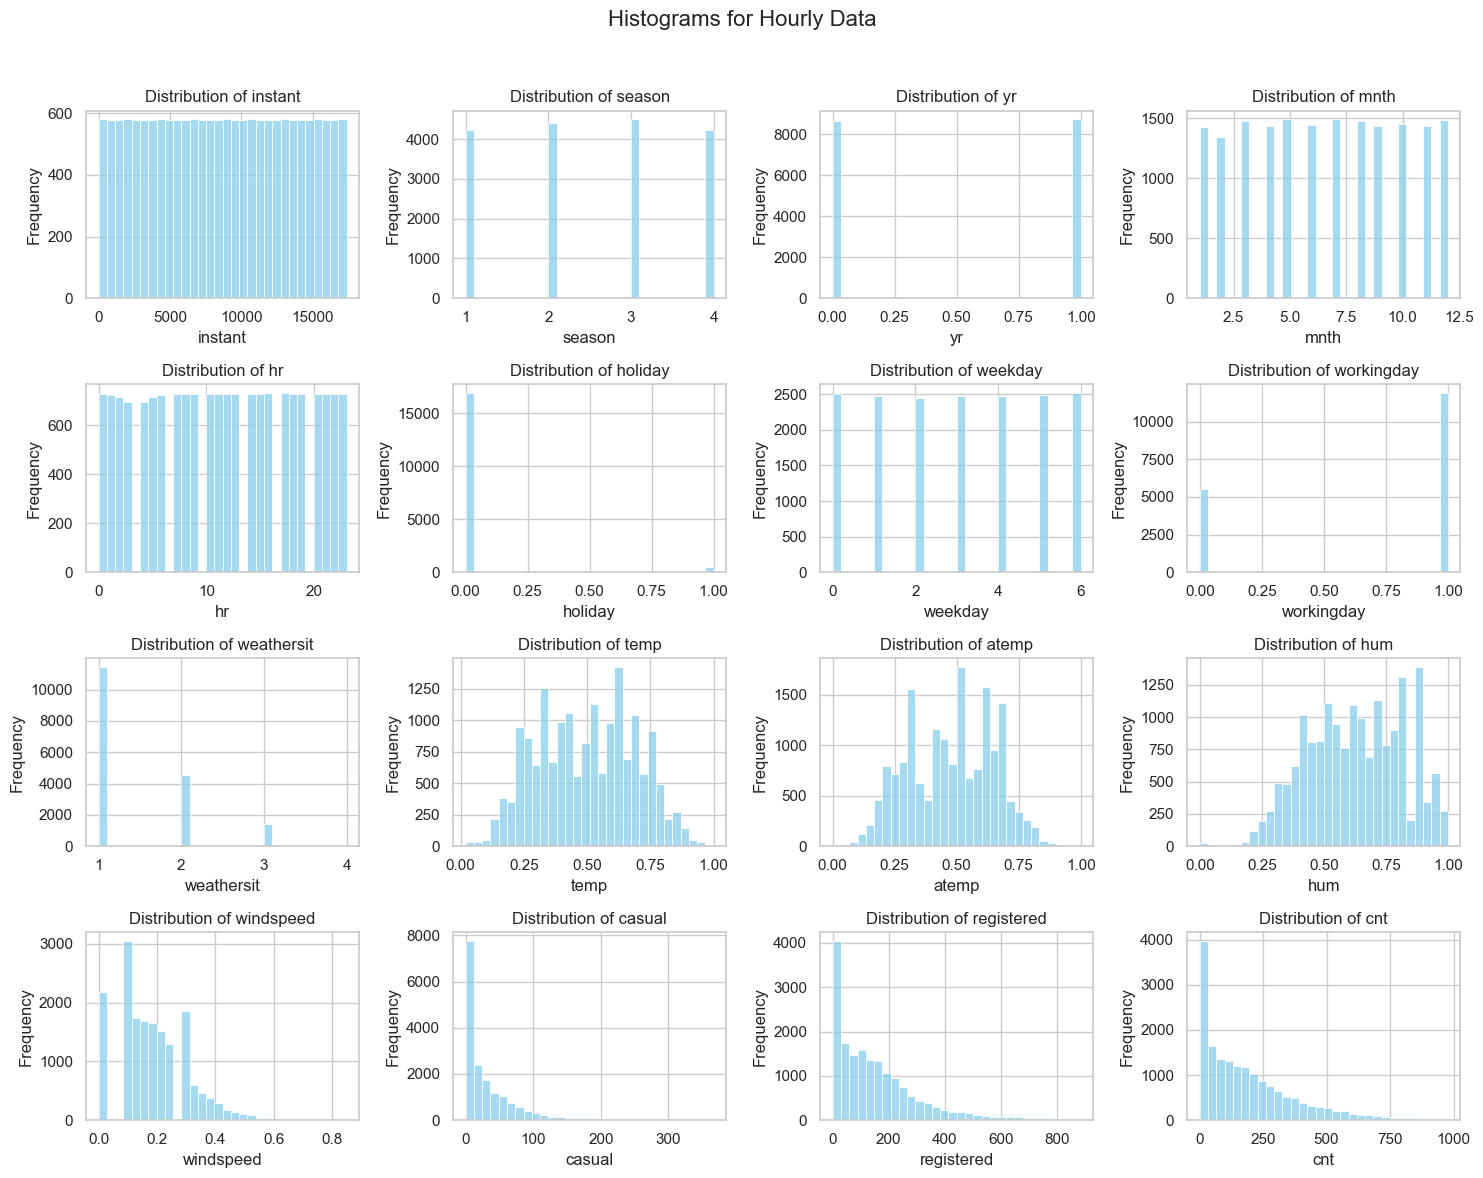

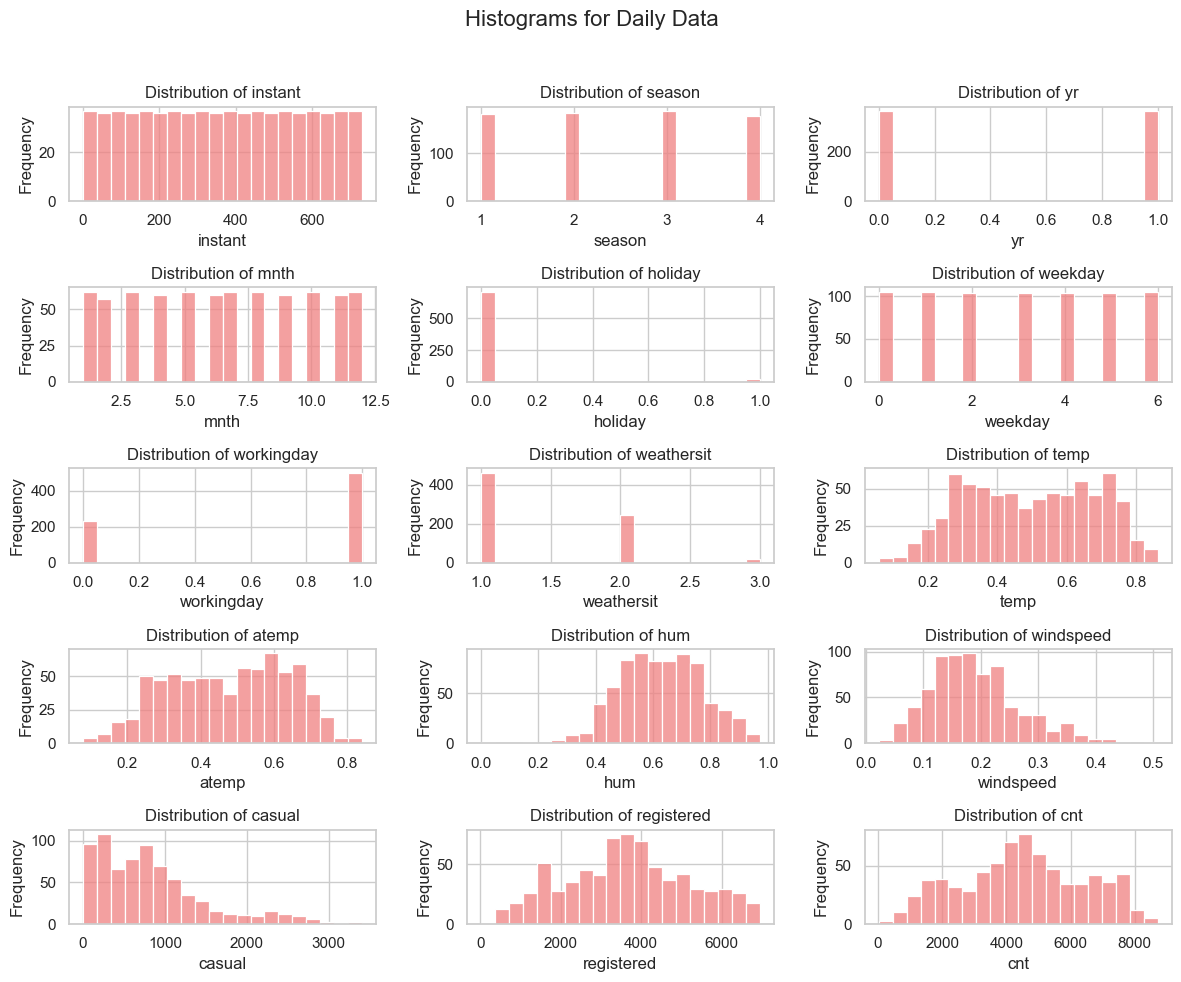

In [7]:
# Atur style for Seaborn plots
sns.set(style="whitegrid")

# 1. Informasi dataset dan statistik deskriptif
print("Informasi Dataset - Hourly Data")
print(hour_data.info())
print("\nRangkuman Parameter Statistik - Hourly Data")
print(hour_data.describe(include="all"))

print("\nInformasi Dataset - Daily Data")
print(day_data.info())
print("\nRangkuman Parameter Statistik - Daily Data")
print(day_data.describe(include="all"))

# 2. Histogram untuk Data Hour
plt.figure(figsize=(15, 12))  # Setting ukuran grafik
plt.suptitle('Histograms for Hourly Data', fontsize=16)  # Menambahkan judul utama

# Plot setiap kolom numerik
num_columns_hour = hour_data.select_dtypes(include=['float64', 'int64']).columns
num_plots_hour = len(num_columns_hour)
rows_hour = math.ceil(num_plots_hour / 4)  # Hitung jumlah baris berdasarkan jumlah kolom

for i, column in enumerate(num_columns_hour, 1):
    plt.subplot(rows_hour, 4, i)  # Adjust jumlah subplot berdasarkan jumlah kolom
    sns.histplot(hour_data[column], bins=30, kde=False, color='skyblue')  # Menggunakan seaborn untuk visualisasi
    plt.title(f'Distribution of {column}', fontsize=12)  # Menambahkan judul pada setiap plot
    plt.xlabel(column)  # Label X
    plt.ylabel('Frequency')  # Label Y

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Mengatur padding agar tidak bertumpuk
plt.show()

# 3. Histogram untuk Data Day 
plt.figure(figsize=(12, 10))  # Setting ukuran grafik
plt.suptitle('Histograms for Daily Data', fontsize=16)  # Menambahkan judul utama

# Plot setiap kolom numerik
num_columns_day = day_data.select_dtypes(include=['float64', 'int64']).columns
num_plots_day = len(num_columns_day)
rows_day = math.ceil(num_plots_day / 3)  # Hitung jumlah baris berdasarkan jumlah kolom

for i, column in enumerate(num_columns_day, 1):
    plt.subplot(rows_day, 3, i)  # Adjust jumlah subplot berdasarkan jumlah kolom
    sns.histplot(day_data[column], bins=20, kde=False, color='lightcoral')  # Menggunakan seaborn untuk visualisasi
    plt.title(f'Distribution of {column}', fontsize=12)  # Menambahkan judul pada setiap plot
    plt.xlabel(column)  # Label X
    plt.ylabel('Frequency')  # Label Y

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Mengatur padding agar tidak bertumpuk
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

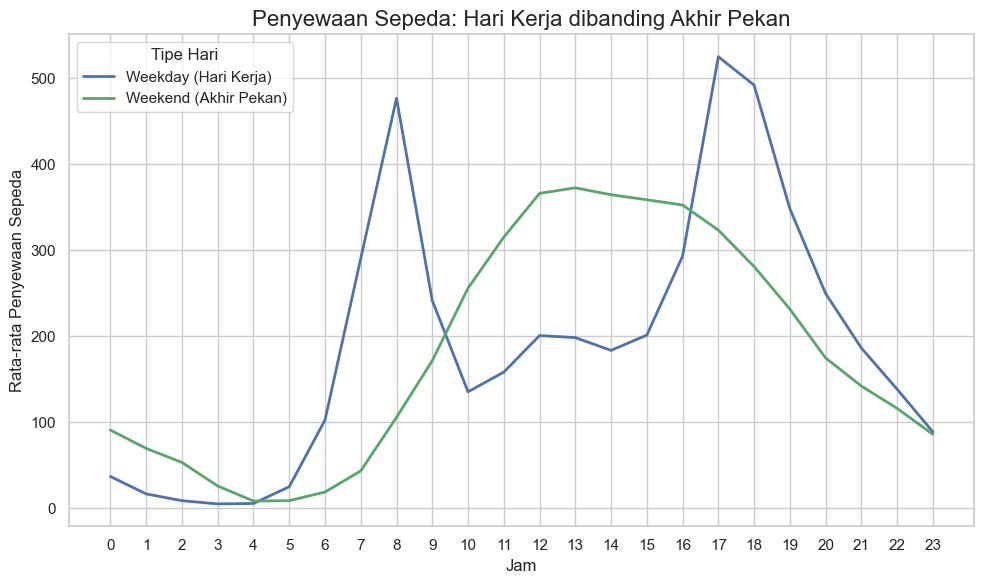

In [8]:
# Mengelompokkan data berdasarkan jam dan hari kerja, lalu menghitung rata-rata penyewaan sepeda
grouped_hour_data = hour_data.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Membuat plot line chart untuk membandingkan hari kerja dibanding akhir pekan
plt.figure(figsize=(10, 6))

# Plot untuk hari kerja (workingday = 1)
weekday_data = grouped_hour_data[grouped_hour_data['workingday'] == 1]
plt.plot(weekday_data['hr'], weekday_data['cnt'], label='Weekday (Hari Kerja)', color='b', linewidth=2)

# Plot untuk akhir pekan (workingday = 0)
weekend_data = grouped_hour_data[grouped_hour_data['workingday'] == 0]
plt.plot(weekend_data['hr'], weekend_data['cnt'], label='Weekend (Akhir Pekan)', color='g', linewidth=2)

# Menambahkan judul, label sumbu, dan legend
plt.title('Penyewaan Sepeda: Hari Kerja dibanding Akhir Pekan', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)

# Menambahkan legend untuk membedakan hari kerja dan akhir pekan
plt.legend(title='Tipe Hari', loc='upper left')

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.xticks(range(0, 24, 1))  # Menampilkan setiap jam pada sumbu X
plt.show()


### Pertanyaan 2:

<Figure size 1200x800 with 0 Axes>

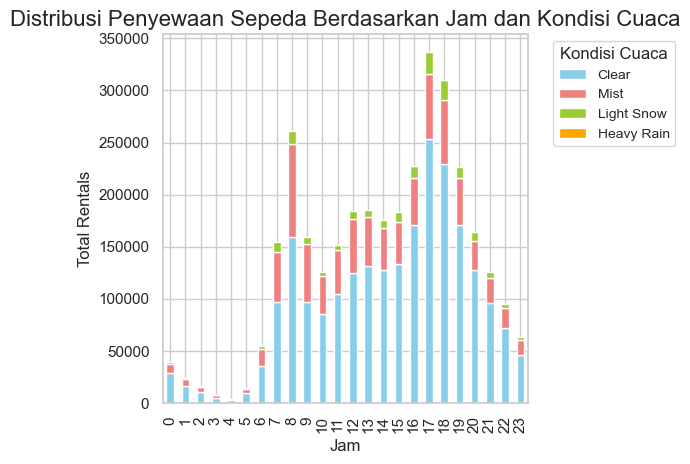

In [9]:
# Dataset memiliki kolom: 'hr' (jam), 'weather' (kondisi cuaca), 'cnt' (jumlah penyewaan)

# 1. Grouping data berdasarkan jam dan cuaca, dan menghitung total penyewaan di setiap kategori
grouped_data = hour_data.groupby(['hr', 'weathersit'])['cnt'].sum().unstack()

# 2. Plotting Stacked Bar Chart
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'yellowgreen', 'orange'])

# 3. Menambahkan judul, label, dan legenda
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Jam dan Kondisi Cuaca', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)

# 4. Menyesuaikan legend sesuai deskripsi cuaca
weather_labels = [
    "Clear", 
    "Mist", 
    "Light Snow", 
    "Heavy Rain"
]
plt.legend(title='Kondisi Cuaca', labels=weather_labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# 4. Menampilkan plot
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

weathersit           1           2           3          4
season                                                   
1           122.055535  103.074689   58.650407  74.333333
2           232.410983  181.261364  115.179803        NaN
3           244.494207  224.848997  171.955390        NaN
4           209.463779  201.483974  116.453333        NaN


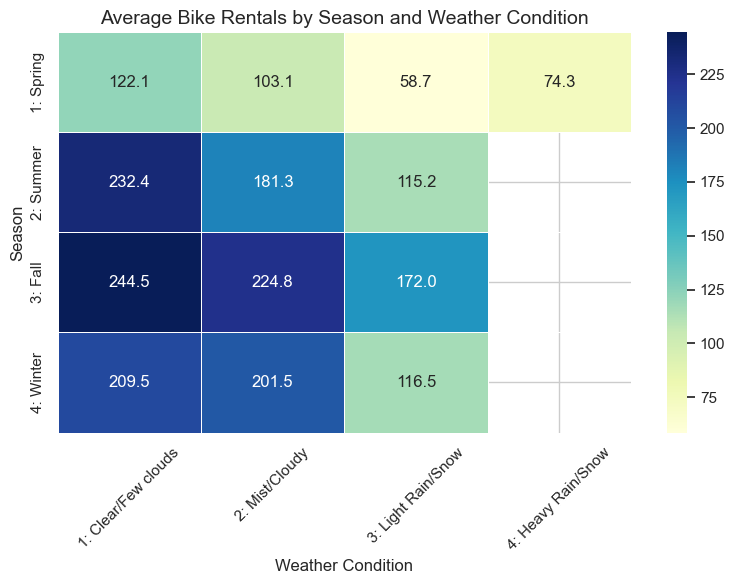

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan cuaca dan musim, lalu menghitung rata-rata jumlah penyewaan sepeda
pivot_table = hour_data.pivot_table(values='cnt', 
                                    index='season', 
                                    columns='weathersit', 
                                    aggfunc='mean')

# Menampilkan Pivot Table
print(pivot_table)

# Membuat heatmap dari pivot table untuk visualisasi pola cluster
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title('Average Bike Rentals by Season and Weather Condition', fontsize=14)
plt.xlabel('Weather Condition')
plt.ylabel('Season')
plt.xticks([0.5, 1.5, 2.5, 3.5], 
           ["1: Clear/Few clouds", "2: Mist/Cloudy", "3: Light Rain/Snow", "4: Heavy Rain/Snow"], rotation=45)
plt.yticks([0.5, 1.5, 2.5, 3.5], ["1: Spring", "2: Summer", "3: Fall", "4: Winter"])
plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1

Berdasarkan hasil visualisasi line chart:

Waktu puncak penggunaan sepeda pada hari kerja cenderung terjadi dua kali sehari, yaitu pada pagi hari sekitar pukul 8 dan sore hari sekitar pukul 17-18. Ini mencerminkan pola perjalanan terkait aktivitas bekerja, di mana pengguna menggunakan sepeda untuk perjalanan pergi dan pulang kerja.
Pada akhir pekan, waktu puncak penggunaan sepeda lebih tersebar, dengan peningkatan stabil sepanjang hari, terutama dari siang hingga sore (pukul 11.00 hingga 17.00). Ini menunjukkan bahwa pengguna lebih sering menggunakan sepeda untuk aktivitas rekreasi atau bersantai, yang tidak terikat dengan jam kerja.
Kesimpulan: Penggunaan sepeda pada hari kerja mengikuti pola aktivitas yang lebih terstruktur terkait jam kerja, sementara pada akhir pekan, penggunaan sepeda lebih merata sepanjang hari, dengan waktu puncak terjadi pada siang hingga sore hari.

- Conclution pertanyaan 2

Berdasarkan hasil visualisasi stacked bar chart:

Cuaca yang cerah atau sedikit berawan (kategori 1) menunjukkan tingkat penggunaan sepeda yang lebih tinggi baik oleh pengguna. Pengguna lebih sensitif terhadap cuaca dibandingkan jumlah penyewaan yang jauh lebih rendah pada cuaca buruk.
Cuaca mendung atau berkabut (kategori 2), penggunaan sepeda oleh pengguna menurun, namun tetap stabil.
Cuaca hujan ringan, salju ringan (kategori 3), terlihat penurunan signifikan dalam penggunaan sepeda oleh kedua kategori pengguna, namun beberapa pengguna cenderung masih menyewa meskipun dalam cuaca buruk.
Cuaca ekstrem seperti hujan deras atau badai salju (kategori 4), hampir tidak ada penggunaan sepeda baik oleh pengguna kasual maupun terdaftar.
Kesimpulan: Cuaca memiliki pengaruh yang signifikan terhadap jumlah penggunaan sepeda, terutama oleh pengguna yang cenderung lebih memilih kondisi cuaca cerah. Pengguna terdaftar tetap menggunakan sepeda meskipun dalam cuaca kurang ideal, namun pada kondisi cuaca yang ekstrem, penggunaan sepeda menurun drastis.